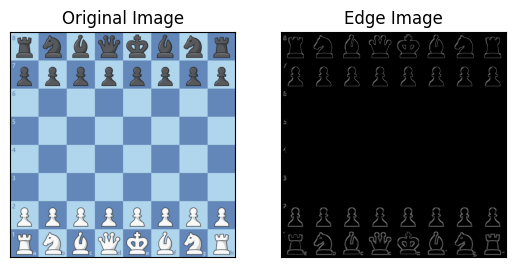

In [34]:
import cv2 as cv
from PIL import Image, ImageGrab 
import numpy as np
import matplotlib.pyplot as plt

im1 = Image.open(r"/home/sbsch/EC602/ChessBoard.png")

#im1.show()

im2 = cv.imread("/home/sbsch/EC602/ChessBoard.png")
#cv.imshow("ChessBoard", im2)
im3 = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

edges = cv.Canny(im3,300,400)
 
plt.subplot(121),plt.imshow(im2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# Convert the image to grayscale
gray = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce image noise and improve contour detection
blurred = cv.GaussianBlur(gray, (3, 3), 0)

# Use adaptive thresholding to create a binary image
thresh = cv.adaptiveThreshold(blurred, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 7, 3)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filter out contours that are too small to be chess pieces
min_contour_area = 200  # Minimum contour area to be considered a piece
max_contour_area = 10000
pieces_contours = [ ]
for cnt in contours:
    if min_contour_area <  cv.contourArea(cnt) < max_contour_area:
        pieces_contours.append(cnt)
    else:
        pass
    
# Draw contours on the original image
im2_with_contours = im2.copy()
cv.drawContours(im2_with_contours, pieces_contours, -1, (0, 255, 0), 2)

# Display the image with detected pieces
#cv.imshow("Detected Pieces", im2_with_contours)
cv.waitKey(0)
cv.destroyAllWindows()
